## Fonte dei dati: European Center For Disease Prevention and Control
https://ourworldindata.org/coronavirus-data

https://ourworldindata.org/coronavirus#our-world-in-data-relies-on-data-from-the-european-cdc

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("owid-covid-data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_UK = df[df.location == "United Kingdom"]
df_IT = df[df.location == "Italy"]

In [4]:
columns_ = ['location', 'date', 'new_cases',  'new_deaths','new_cases_per_million','new_deaths_per_million','new_tests_per_thousand','positive_rate',"new_tests_smoothed_per_thousand","new_cases_smoothed_per_million","positive_rate"]
df_UK = df_UK[columns_]
df_IT = df_IT[columns_]

### Adding new_cases_per_million/new_tests_per_thousand
df_UK["New_cases_pop_and_tests_adjusted"] = df_UK["new_cases_per_million"]/df_UK["new_tests_per_thousand"]
df_IT["New_cases_pop_and_tests_adjusted"] = df_IT["new_cases_per_million"]/df_IT["new_tests_per_thousand"]
### Smoothed
df_UK["New_cases_pop_and_tests_adjusted_smoothed"] = df_UK["new_cases_smoothed_per_million"]/df_UK["new_tests_smoothed_per_thousand"]
df_IT["New_cases_pop_and_tests_adjusted_smoothed"] = df_IT["new_cases_smoothed_per_million"]/df_IT["new_tests_smoothed_per_thousand"]


### Adding new_tests_per_million
df_IT["new_tests_per_million"] = df_IT["new_tests_per_thousand"]/1000
df_UK["new_tests_per_million"] = df_UK["new_tests_per_thousand"]/1000


df_UK['date'] = pd.to_datetime(df_UK['date'])
df_IT['date'] = pd.to_datetime(df_IT['date'])
nrows = df_UK.shape[0]
ncols = df_UK.shape[1]

In [5]:
"""
'last Sunday when the number was artificially raised to 22,961 
to compensate for thousands of cases that were missed between 25 September and 2 October due to a technical mistake.'
For additional information on the issue go to https://www.newscientist.com/article/2237475-covid-19-news-germany-france-and-belgium-tighten-rules-to-curb-virus/
"""
# Fix the outlier issue explained above --> Interpolating day before and after
df_UK.loc[df_UK['date'] == pd.to_datetime("2020-10-05"), ['new_cases_per_million']] = (189.597 + 185.502)/2
df_UK.loc[df_UK['date'] == pd.to_datetime("2020-10-05"), ['new_cases']] = (12871.0 + 12593.0)/2

### Grafico dei nuovi casi giornalieri nei due paesi
Se ci vogliamo fare un'idea della situazione COVID-19 nei due diversi paesi che stiamo confrontando, probabilmente il primo confronto che ci verrà in mente di fare è quello dei nuovi casi che ciascun paese riporta ogni giorno.

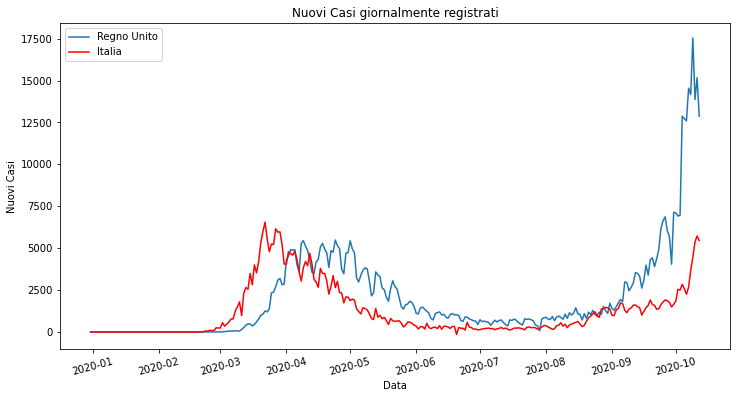

In [32]:
plt.figure(1, figsize=(12,6))

# UK plot
p1 = sns.lineplot(x="date", y="new_cases", data=df_UK)
plt.xticks(rotation=15)
# Italy plot
p2 = sns.lineplot(x="date", y="new_cases", data=df_IT, color = "r")
plt.xticks(rotation=15)
plt.title('Nuovi Casi giornalmente registrati')
plt.xlabel("Data")
plt.ylabel("Nuovi Casi")
ax = plt.gca()
ax.legend(handles=ax.lines, labels=["Regno Unito","Italia"])
plt.show()


Questa prima rappresentazione tuttavia ha due problemi:

* Non tiene in considerazione il numero di abitanti di ciascun paese (100 contagi in un paese che ha 1000 abitanti sono molto più gravi di 100 contagi in un paese che ne ha 100000)
* Non tiene in considerazione il numero di tamponi che ciascun paese fa (100 contagi su 100 tamponi fatti è molto peggio di 100 contagi su 1000 tamponi fatti)

Il grafico seguente tiene quindi conto della prima di queste due considerazione ed aggiusta i dati tenendo in considerazione le diverse popolazioni dei due paesi.

### Grafico dei casi per milione di abitanti

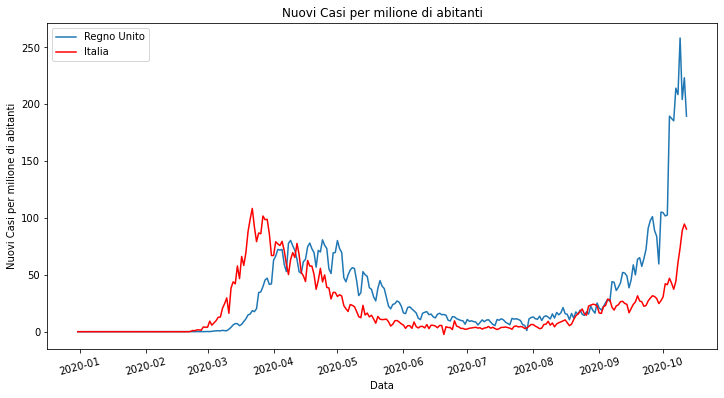

In [31]:
plt.figure(1, figsize=(12,6))

# UK plot
p1 = sns.lineplot(x="date", y="new_cases_per_million", data=df_UK)
plt.xticks(rotation=15)
# Italy plot
p2 = sns.lineplot(x="date", y="new_cases_per_million", data=df_IT,color = "r")
plt.xticks(rotation=15)

plt.title('Nuovi Casi per milione di abitanti')
plt.xlabel("Data")
plt.ylabel("Nuovi Casi per milione di abitanti")
ax = plt.gca()
ax.legend(handles=ax.lines, labels=["Regno Unito","Italia"])
plt.show()


In questa rappresentazione non vediamo grandi aggiustamenti, e ciò è dato dal fatto che Italia e Regno unito hanno popolazioni molto simili (Italia: 60 mln, Regno unito 66 mln).

Osserviamo quindi ora quanti tamponi per migliaio di persone vengono fatti da ciascuno dei due paesi quotidianamente.

### Numero di test effettuati ogni 1000 cittadini da Italia e Regno Unito

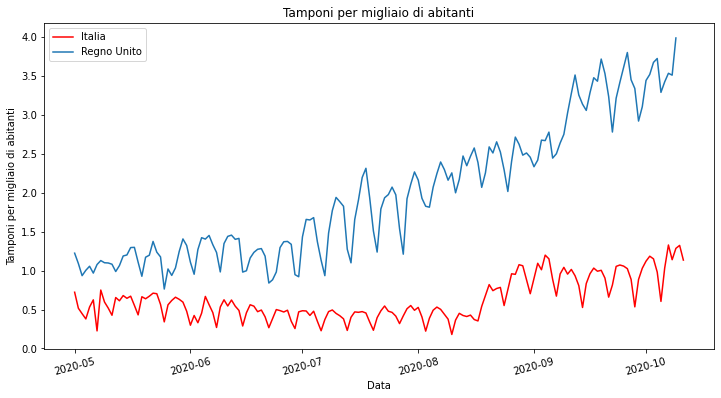

In [33]:
plt.figure(1, figsize=(12,6))

# Lets focus only on values from May on

start_date = pd.to_datetime("2020-05-01")
df_UK_2 = df_UK.loc[df_UK["date"] >= start_date]
df_IT_2 = df_IT.loc[df_IT["date"] >= start_date]

# UK plot
p1 = sns.lineplot(x="date", y="new_tests_per_thousand", data=df_IT_2, color = "r")
plt.xticks(rotation=15)
# Italy plot
p2 = sns.lineplot(x="date", y="new_tests_per_thousand", data=df_UK_2)
plt.xticks(rotation=15)
plt.title('Tamponi per migliaio di abitanti')
plt.xlabel("Data")
plt.ylabel("Tamponi per migliaio di abitanti")


ax = plt.gca()
ax.legend(handles=ax.lines, labels=["Italia","Regno Unito"])
plt.show()

### Grafico Casi COVID-19 aggiustato per Popolazione e Numero di Tamponi giornalieri effettuati
Dobbiamo dunque ora effettuare l'ultimo aggiustamento ai dati, quello relativo al numero di tamponi giornalieri fatto da ciascuno dei due paesi, sempre in rapporto alla popolazione del paese stesso.

Qui di seguito si può osservare la situazione COVID-19 per Italia e Regno Unito al netto degli aggiustamenti di popolazione e numero di tamponi.

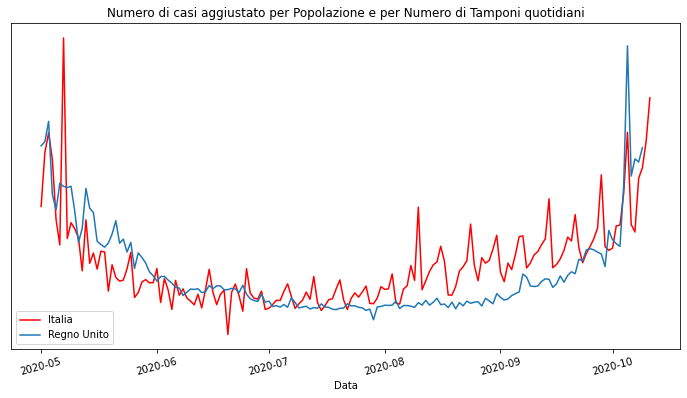

In [34]:
plt.figure(1, figsize=(12,6))

# UK plot
p1 = sns.lineplot(x="date", y="New_cases_pop_and_tests_adjusted", data=df_IT_2, color = "r")
plt.xticks(rotation=15)
# Italy plot
p2 = sns.lineplot(x="date", y="New_cases_pop_and_tests_adjusted", data=df_UK_2)
plt.xticks(rotation=15)
plt.title('Numero di casi aggiustato per Popolazione e per Numero di Tamponi quotidiani')
plt.xlabel("Data")
plt.ylabel("Indice di Positività")

ax = plt.gca()
ax.axes.yaxis.set_visible(False)
ax.legend(handles=ax.lines, labels=["Italia","Regno Unito"])
plt.show()


Si può notare da questo grafico come la situazione nei due paesi non sia poi così differente come potrebbe parre da una preliminare esaminazione del numero nominale di casi giornalieri registrati.

### Grafico dell'indice di positività nei due paesi
Qui di seguito possiamo vedere l'[indice di positività](https://www.jhsph.edu/covid-19/articles/covid-19-testing-understanding-the-percent-positive.html#:~:text=The%20percent%20positive%20will%20be,haven't%20been%20tested%20yet.) ovvero il la percentuale di tamponi positivi che ciascun paese registra.
Questa è la metrica principe utilizzata dagli epidemiologici per stimare quale percentuale di individui in una popolazione potrebbe essere vittima del contagio.

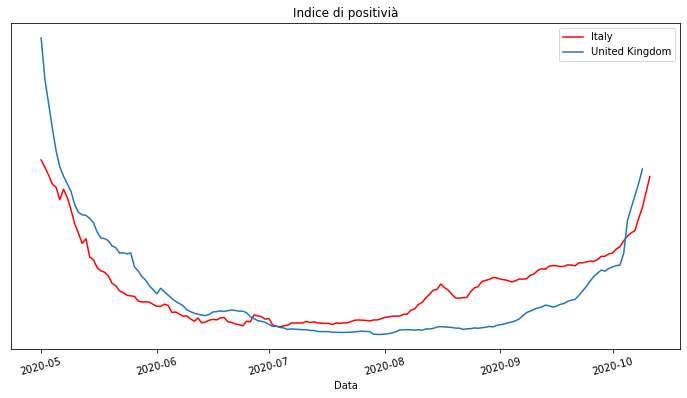

In [35]:
plt.figure(1, figsize=(12,6))

# UK plot
p1 = sns.lineplot(x="date", y="New_cases_pop_and_tests_adjusted_smoothed", data=df_IT_2, color ="r")
plt.xticks(rotation=15)
# Italy plot
p2 = sns.lineplot(x="date", y="New_cases_pop_and_tests_adjusted_smoothed", data=df_UK_2)
plt.xticks(rotation=15)
plt.title('Indice di positivià')
plt.xlabel("Data")
plt.ylabel("Indice di Positività")
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
ax.legend(handles=ax.lines, labels=["Italy","United Kingdom"])
plt.show()

# Conclusioni

Possiamo concludere che, nonostante a prima vista possa sembrare che esista una forte discrepanza tra la diffusione del COVID-19 in Italia e nel Regno Unito, questa discrepanza deriva in maniera prevalente dal differente numero di tamponi quotidiani che i due paesi effettuano. 